In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve,accuracy_score,precision_score
from sklearn.metrics import classification_report,recall_score,f1_score

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading dataset
df = pd.read_csv('creditcard.csv')

In [4]:
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0


In [5]:
#Total number of rows and columns
df.shape

(3973, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.count()

Time      3973
V1        3973
V2        3973
V3        3973
V4        3973
V5        3973
V6        3973
V7        3973
V8        3973
V9        3973
V10       3973
V11       3973
V12       3973
V13       3973
V14       3973
V15       3973
V16       3973
V17       3973
V18       3973
V19       3973
V20       3973
V21       3973
V22       3973
V23       3972
V24       3972
V25       3972
V26       3972
V27       3972
V28       3972
Amount    3972
Class     3972
dtype: int64

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

There is no missing data in the entire dataset

In [10]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0005037783375314861
Fraud Cases: 2
Valid Transactions: 3970


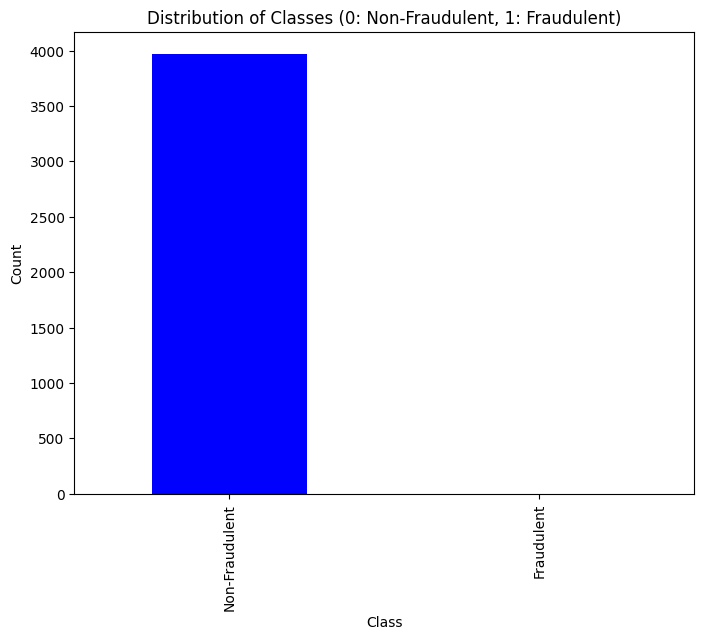

In [11]:
# Visualize the distribution of 'Class' (fraudulent vs. non-fraudulent transactions)
plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Classes (0: Non-Fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1], ['Non-Fraudulent','Fraudulent'])
plt.show()

Text(0.5, 1.0, 'Distribution of Amount')

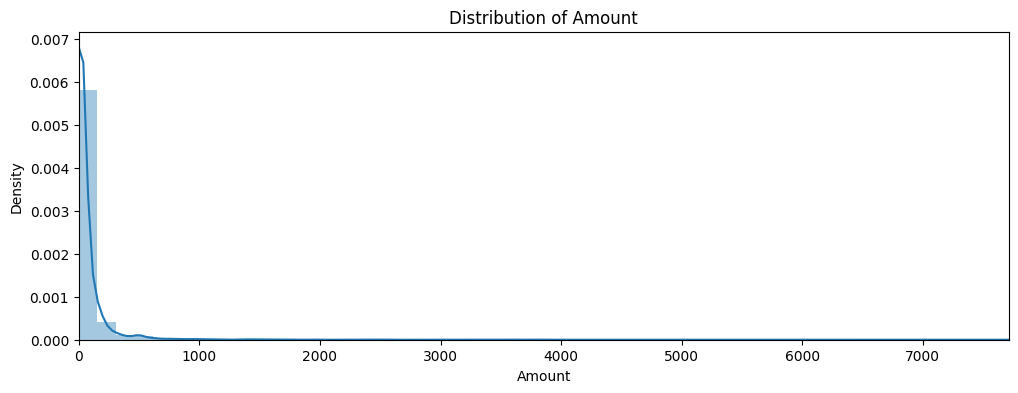

In [12]:
amount_val = df['Amount'].values
plt.figure(figsize = (12,4))
sns.distplot(df['Amount'])
plt.xlim(min(amount_val),max(amount_val))
plt.title("Distribution of Amount")

In [13]:
#Deleting duplicate columns
df = df.drop_duplicates()
df.count()

Time      3941
V1        3941
V2        3941
V3        3941
V4        3941
V5        3941
V6        3941
V7        3941
V8        3941
V9        3941
V10       3941
V11       3941
V12       3941
V13       3941
V14       3941
V15       3941
V16       3941
V17       3941
V18       3941
V19       3941
V20       3941
V21       3941
V22       3941
V23       3940
V24       3940
V25       3940
V26       3940
V27       3940
V28       3940
Amount    3940
Class     3940
dtype: int64

In [14]:

timedelta = pd.to_timedelta(df['Time'],unit='s')

df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

Text(0.5, 1.0, 'Amounts by hours of Frauds and Normal Transactions')

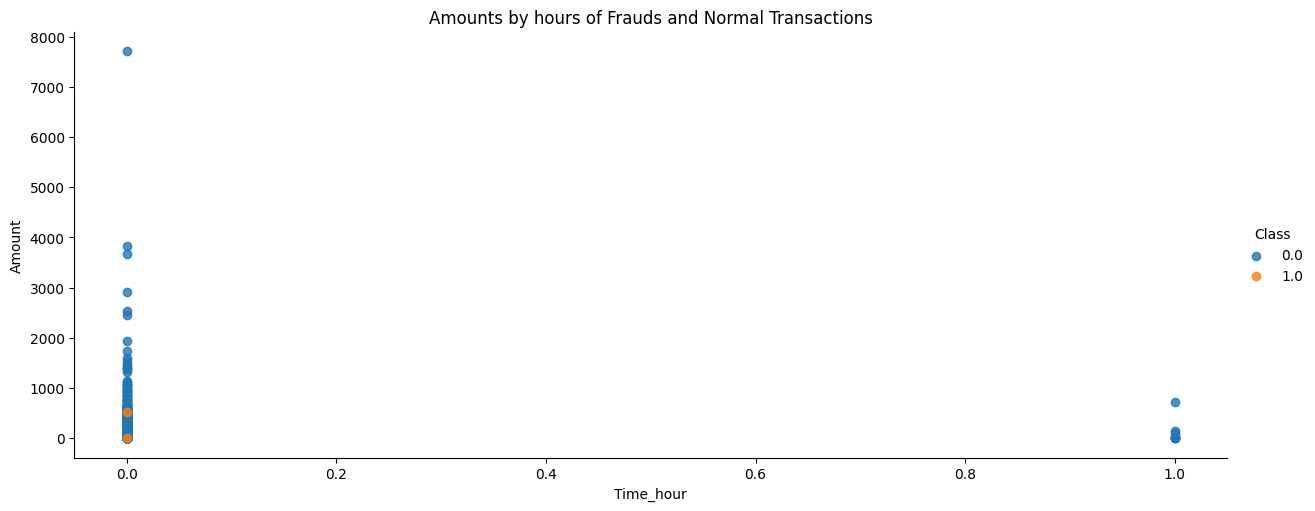

In [15]:
#amount vs time distribution
ax = sns.lmplot(y='Amount',x='Time_hour',fit_reg=False,aspect=2.5,data=df,hue='Class')
plt.title("Amounts by hours of Frauds and Normal Transactions",fontsize=12)


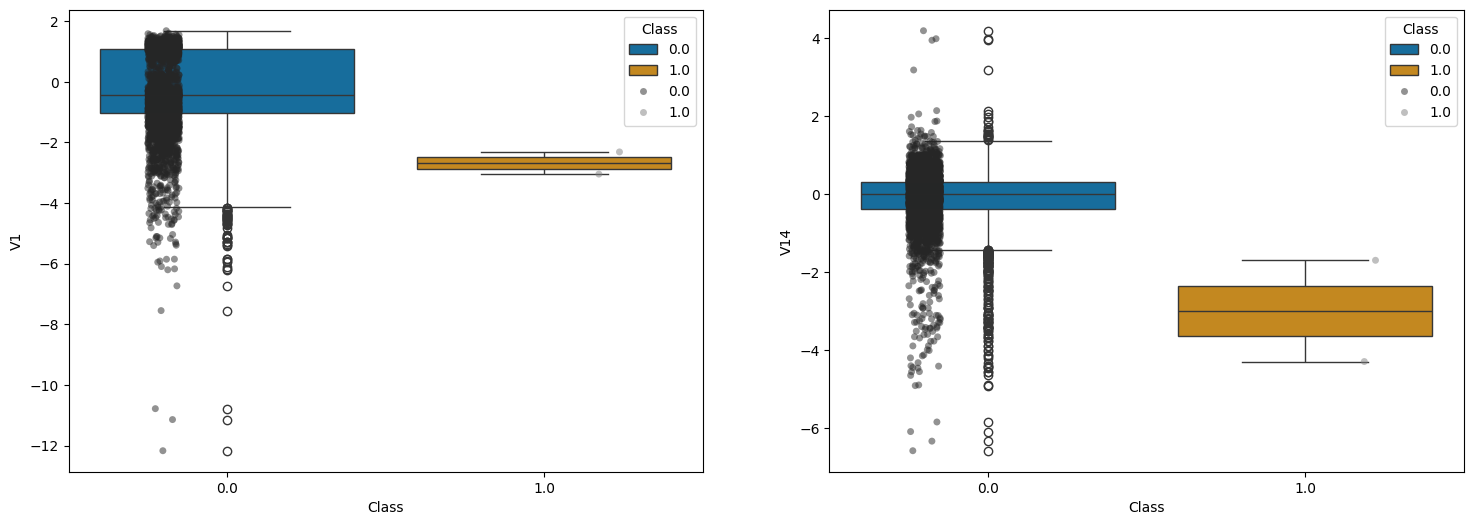

In [16]:
cols = ['V1', 'V14']
f, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
for index,col in enumerate(cols):
    sns.boxplot(x="Class", y=col, hue="Class", palette="colorblind", data=df, ax=axes[index])
    sns.stripplot(x='Class', y=col,  data=df,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,color='grey',hue='Class')
plt.show()
plt.clf()
plt.close()

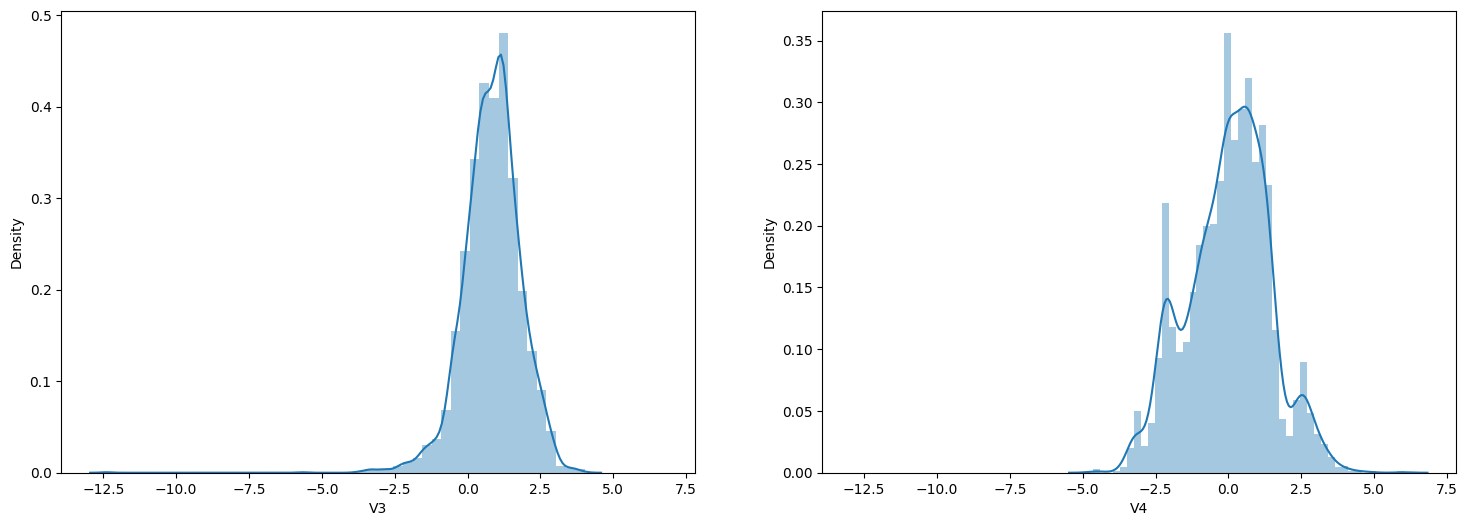

In [17]:
f, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
sns.distplot(df['V3'],ax=axes[0])
sns.distplot(df['V4'],ax=axes[1])

plt.show()
plt.clf()
plt.close()

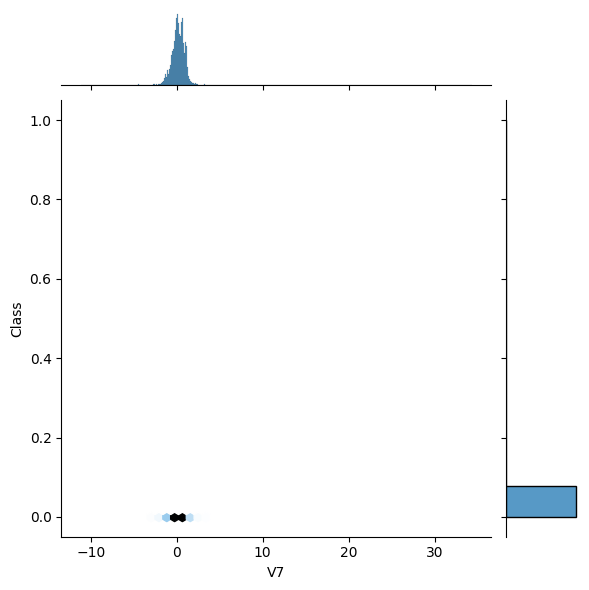

In [18]:
sns.jointplot(y='Class',x='V7',data=df,kind='hex')

<Axes: xlabel='V9', ylabel='Class'>

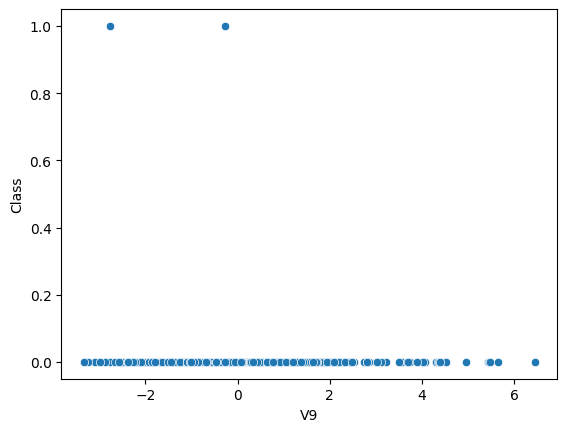

In [19]:
sns.scatterplot(x="V9", y="Class",data=df)

<Axes: xlabel='Class', ylabel='Amount'>

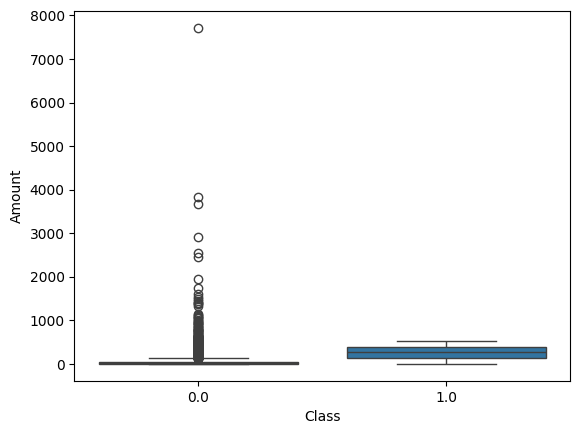

In [20]:
sns.boxplot(y="Amount", x="Class",data=df)

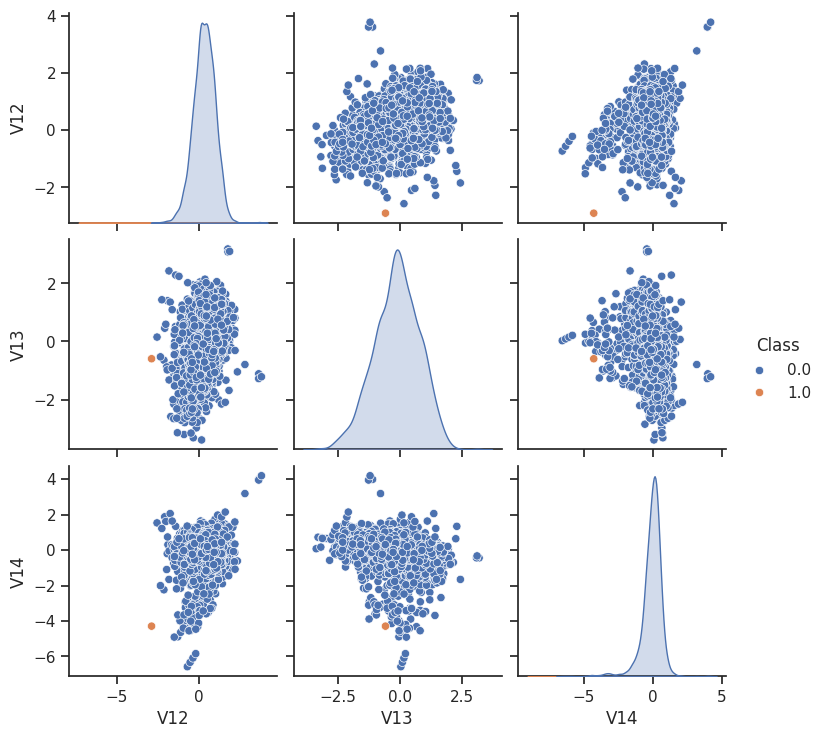

In [21]:
sns.set(style="ticks")
sns.pairplot(df[["V12","V13","V14","Class"]], hue="Class")

<Axes: >

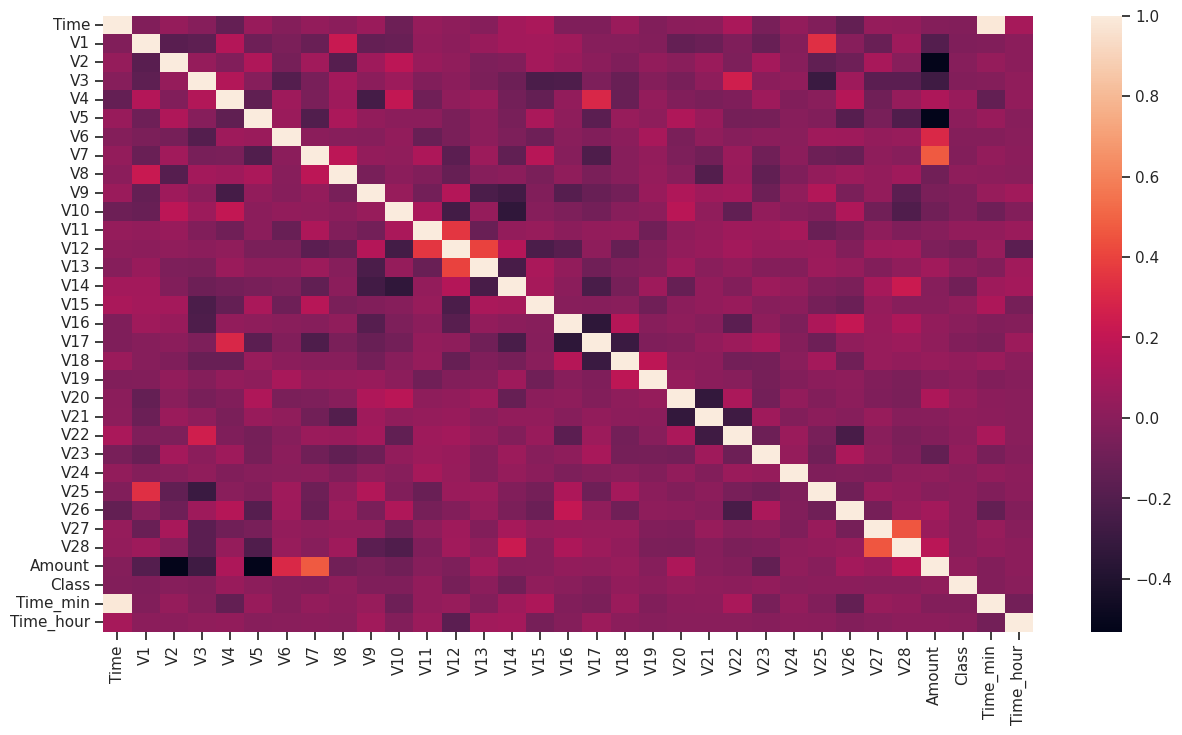

In [22]:
f, ax = plt.subplots(figsize=(15, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [23]:
#Scale amount by Standardization
ss = StandardScaler()
df['amount_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

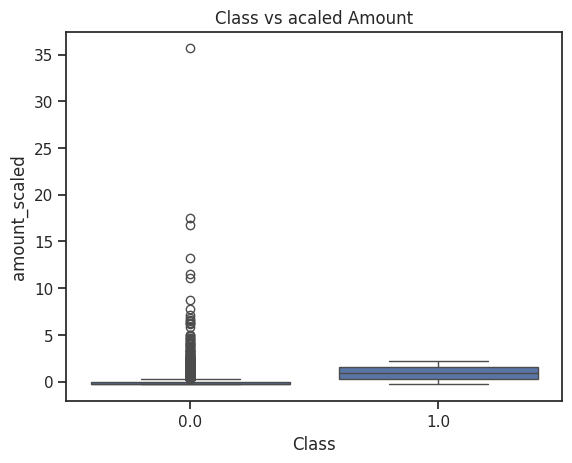

In [24]:
sns.boxplot(x ="Class",y="amount_scaled",data=df)
plt.title("Class vs acaled Amount")
plt.show()

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

# Drop rows with missing values in the target variable
df.dropna(subset=['Class'], inplace=True)

# Prepare features and target
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Class'])
print(X_train.shape, X_test.shape)


(3152, 32) (788, 32)


In [26]:
#Inspect whether the 2 sets are indeed stratified.
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

0.0    0.999365
1.0    0.000635
Name: Class, dtype: float64
0.0    1.0
Name: Class, dtype: float64


In [27]:
!pip install imbalanced-learn



In [28]:
#Apply SMOTE to create synthetic observations from minority class

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')


X_train:  (3152, 32)
y_train:  (3152,)
X_test:  (788, 32)
y_test:  (788,)


............




In [29]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier (class_weight='balanced', random_state=123)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=123)

In [30]:
importances = rf.feature_importances_
sorted(importances)

[0.0,
 1.3004936676429803e-05,
 2.292710327719804e-05,
 4.456218642576398e-05,
 5.7184738457606635e-05,
 0.00016014189077508709,
 0.00038786577598808384,
 0.00042042021513189246,
 0.000918052854548635,
 0.005991338515002472,
 0.008650192514163572,
 0.009619721748520762,
 0.009656049328862375,
 0.011513763866033623,
 0.011779603703902783,
 0.016172676716508554,
 0.018241558298955345,
 0.02318782888218432,
 0.02550501220533196,
 0.026507438788046067,
 0.030334817398782417,
 0.03541379029147297,
 0.03610253801598516,
 0.04566090527221377,
 0.04841871482041125,
 0.04873068795481141,
 0.0635652135037317,
 0.07644931071937165,
 0.08274251761635294,
 0.1072851633652871,
 0.12486862500605617,
 0.1315783717667309]

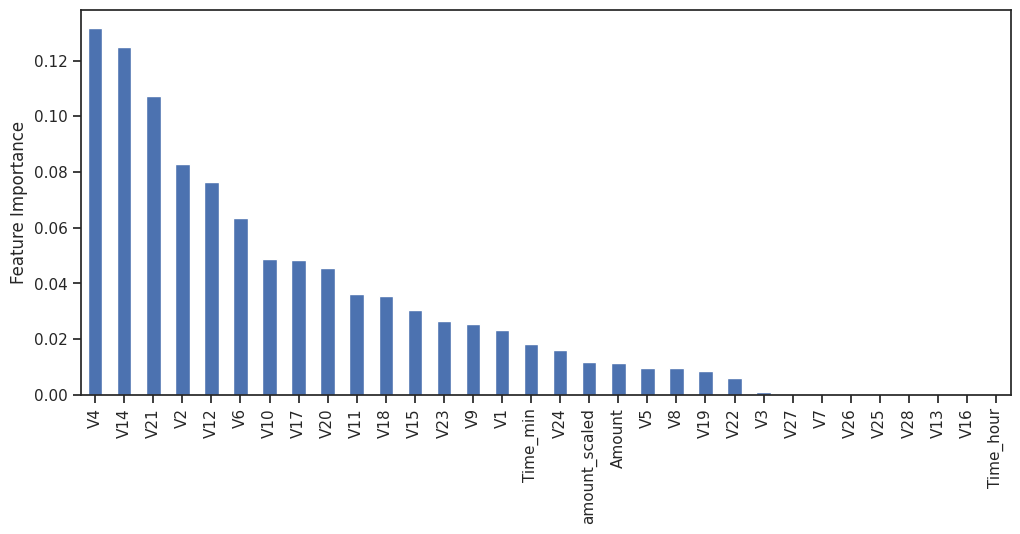

In [31]:
feature_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots(figsize=(12, 5))
feature_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_ylabel("Feature Importance")
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
pred_train_dt = dt.predict(X_train)
pred_dt = dt.predict(X_test)


In [35]:
matrix_dt = confusion_matrix(y_test, pred_dt)
matrix_dt

array([[787,   1],
       [  0,   0]])

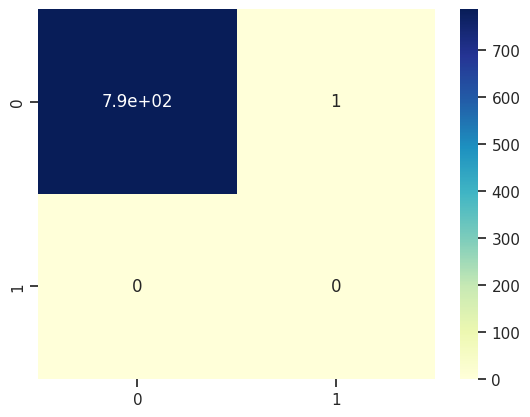

In [36]:
sns.heatmap(data=matrix_dt, annot=True , cmap="YlGnBu")
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn import metrics
from imblearn.pipeline import Pipeline, make_pipeline

In [38]:
def model_eval(y_test, predicted):

    accuracy = accuracy_score(y_test, predicted)*100
    precision = precision_score(y_test, predicted)*100
    recall = recall_score(y_test, predicted)*100
    f1 = f1_score(y_test, predicted) *100
    confusion_matrix =metrics.confusion_matrix(y_test, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.grid(False)
    plt.show()

    auc = np.NaN
    if auc:
        auc = metrics.roc_auc_score(y_test, predicted )*100
        fpr, tpr, threshold = roc_curve(y_test, predicted)
        plt.plot(fpr, tpr, label='Model', c='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', c='yellow')
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

    print('Accuracy:',accuracy  )
    print('Precision:', precision )
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('AUC:', auc)
    print('Classification Report:',classification_report)

    return [recall, precision, f1, auc]

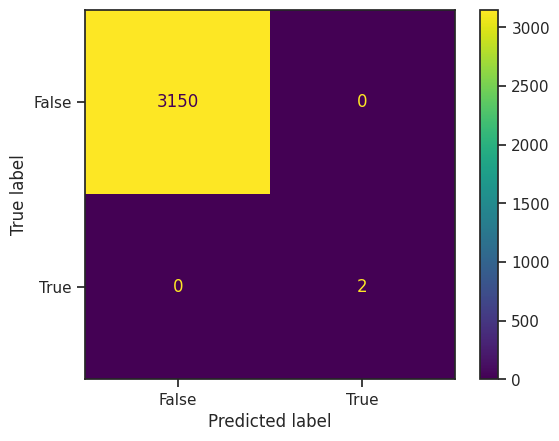

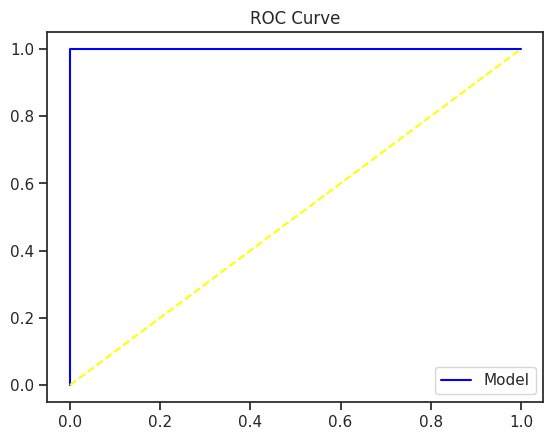

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 Score: 100.0
AUC: 100.0
Classification Report: <function classification_report at 0x7e9f9cca8790>


[100.0, 100.0, 100.0, 100.0]

In [39]:
model_eval(y_train, pred_train_dt)

In [40]:

from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
   'min_samples_split' : [10,20,30,40,50,60]
}
grid_search_dt = GridSearchCV(estimator = dt,
                             param_grid = parameters,
                             scoring = 'accuracy',
                             cv = 10,
                             n_jobs = -1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)
best_accuracy = grid_search_dt.best_score_
best_parameters = grid_search_dt.best_params_
best_parameters

{'max_depth': 1, 'min_samples_split': 30}

In [41]:
pred_gstrain_dt =grid_search_dt.predict(X_train)
pred_gstest_dt = grid_search_dt.predict(X_test)

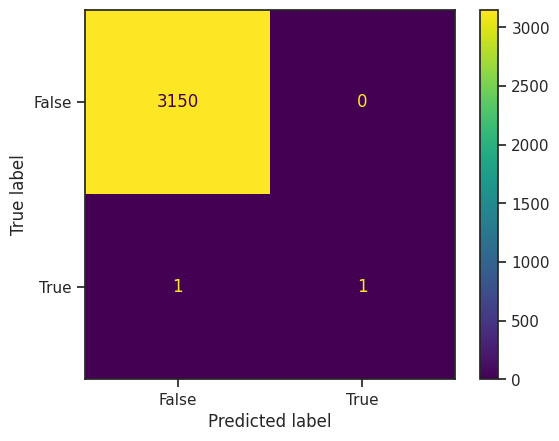

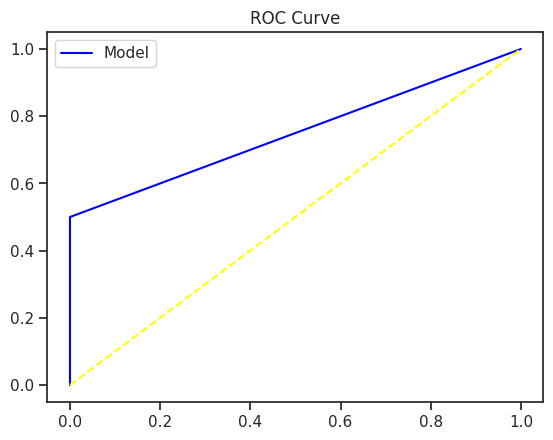

Accuracy: 99.96827411167513
Precision: 100.0
Recall: 50.0
F1 Score: 66.66666666666666
AUC: 75.0
Classification Report: <function classification_report at 0x7e9f9cca8790>


[50.0, 100.0, 66.66666666666666, 75.0]

In [42]:
model_eval(y_train, pred_gstrain_dt)

In [43]:
matrix_gs_dt = confusion_matrix(y_test, pred_gstest_dt)
matrix_gs_dt

array([[788]])

In [44]:
#Evaluating using ROC Curve
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, pred_dt)
dt_gridsearch_fpr, dt_gridsearch_tpr, dt_gridsearch_threshold = roc_curve(y_test, pred_gstest_dt)


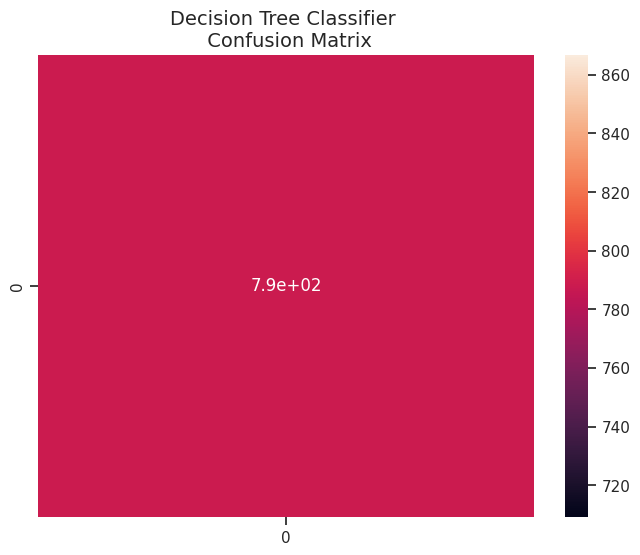

In [45]:
#Confusion Matrix

fig = plt.figure(figsize=(8,6))


sns.heatmap(matrix_gs_dt,  annot=True)
plt.title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)
plt.show()





In [46]:
#Evaluation using classification report

def model_class_rep(actual, predicted):
        acc_score = accuracy_score(actual, predicted)
        conf_matrix = confusion_matrix(actual, predicted)
        clas_rep = classification_report(actual, predicted)

        print('Model Accuracy is: ', acc_score)
        print(conf_matrix)
        print(clas_rep)

In [47]:
results = model_class_rep(y_test, pred_gstest_dt)

Model Accuracy is:  1.0
[[788]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       788

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788



In [48]:
#Evaluating using Accuracy
acc_score = accuracy_score(y_test, pred_gstest_dt)
print('Decision Tree Classifier Accuracy : ',round(acc_score * 100,2).astype(str) + '%')


Decision Tree Classifier Accuracy :  100.0%
